#### Import of Libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [85]:
df = pd.read_csv('datasets/WholesaleCustomers/WholesaleCustomersData.csv')
df=df.drop(columns=["Region"])

In [86]:
df.head(5)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


In [87]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

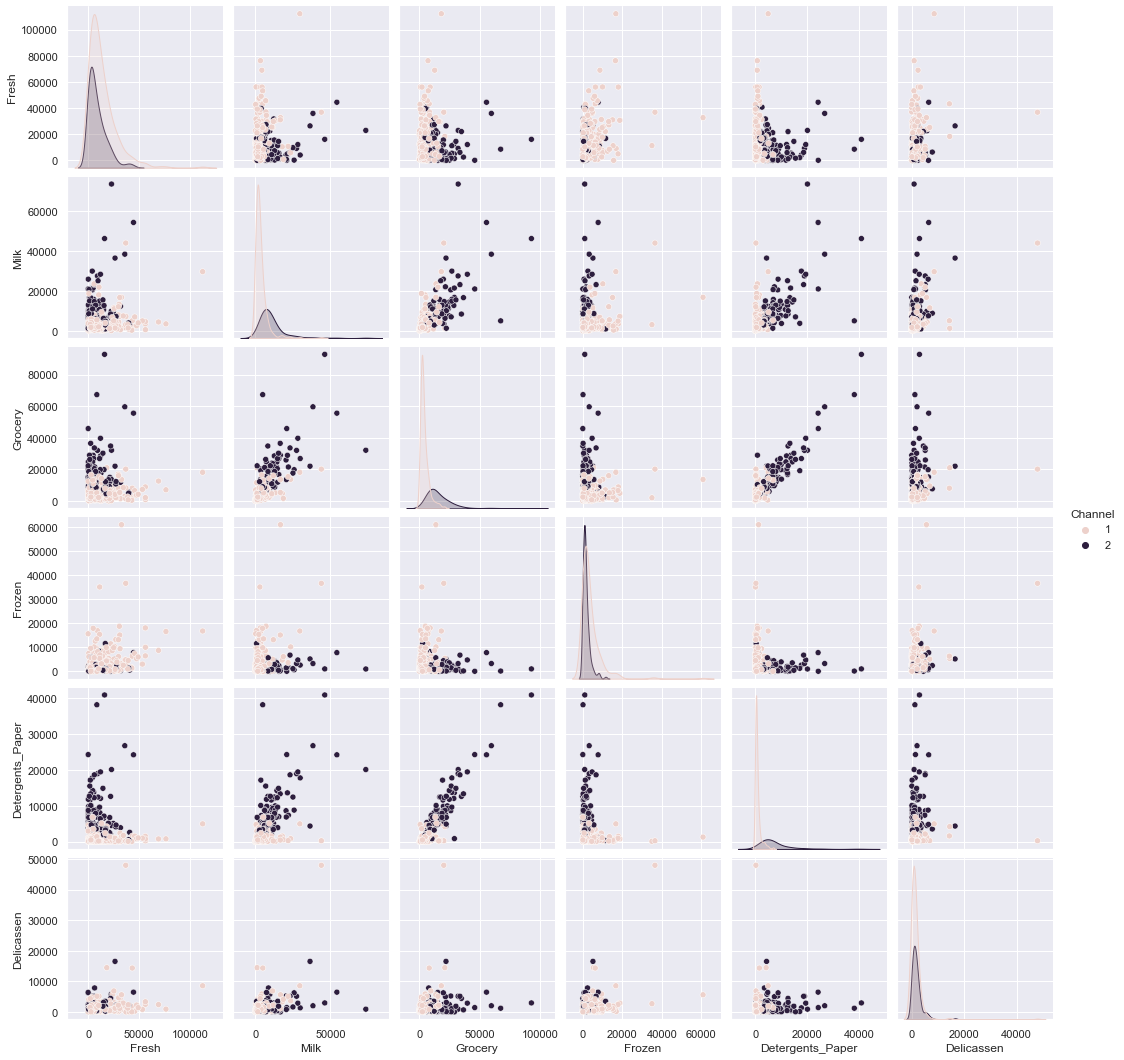

In [88]:
sns.pairplot(df, hue='Channel')
plt.show()

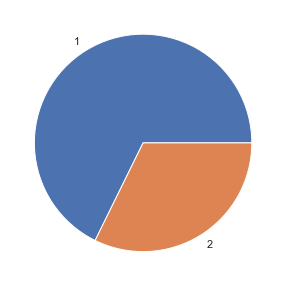

In [89]:
y =df['Channel']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [90]:
X = df.drop(columns=['Channel'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


#### Standardize the Data

In [91]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,-3.431598e-17,1.001138,-0.949683,-0.702334,-0.276760,0.390523,7.927738
Milk,440.0,0.000000e+00,1.001138,-0.778795,-0.578306,-0.294258,0.189092,9.183650
Grocery,440.0,-4.037175e-17,1.001138,-0.837334,-0.610836,-0.336668,0.284911,8.936528
Frozen,440.0,3.633457e-17,1.001138,-0.628343,-0.480431,-0.318804,0.099464,11.919002
Detergents_Paper,440.0,2.422305e-17,1.001138,-0.604416,-0.551135,-0.433600,0.218482,7.967672
Delicassen,440.0,-8.074349e-18,1.001138,-0.540264,-0.396401,-0.198577,0.104860,16.478447


#### Observations and Variables

In [92]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

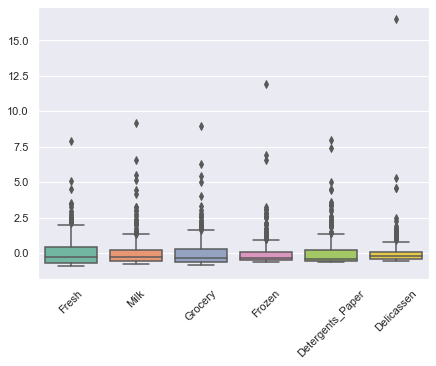

In [93]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

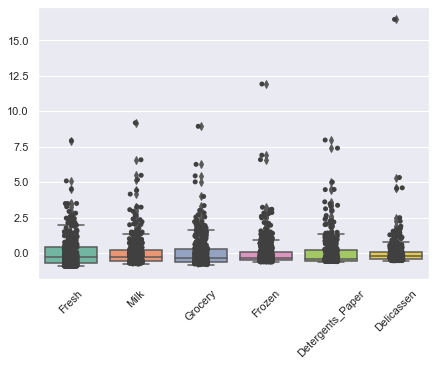

In [94]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

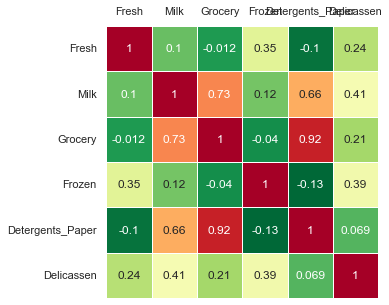

In [95]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [96]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [97]:
out['PC']

,PC1,PC2,PC3,PC4,PC5
0,0.193291,-0.305100,-0.140878,-0.486432,0.495281
1,0.434420,-0.328413,0.319007,-0.178830,0.365579
2,0.811143,0.815096,1.523416,-1.254082,-0.379054
3,-0.778648,0.652754,0.163012,0.380060,-0.276138
4,0.166287,1.271434,0.066279,-0.826227,-0.394211
...,...,...,...,...,...
435,0.870602,2.220845,-0.605500,1.049263,0.423781
436,-0.902520,1.676916,-1.418980,-0.572274,-0.257026
437,3.465704,-1.039838,-0.713161,0.033408,-0.538768
438,-0.918023,-0.030047,0.258408,-0.524578,-0.093215


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (44.0% expl.var)', ylabel='PC2 (28.3% expl.var)'>)

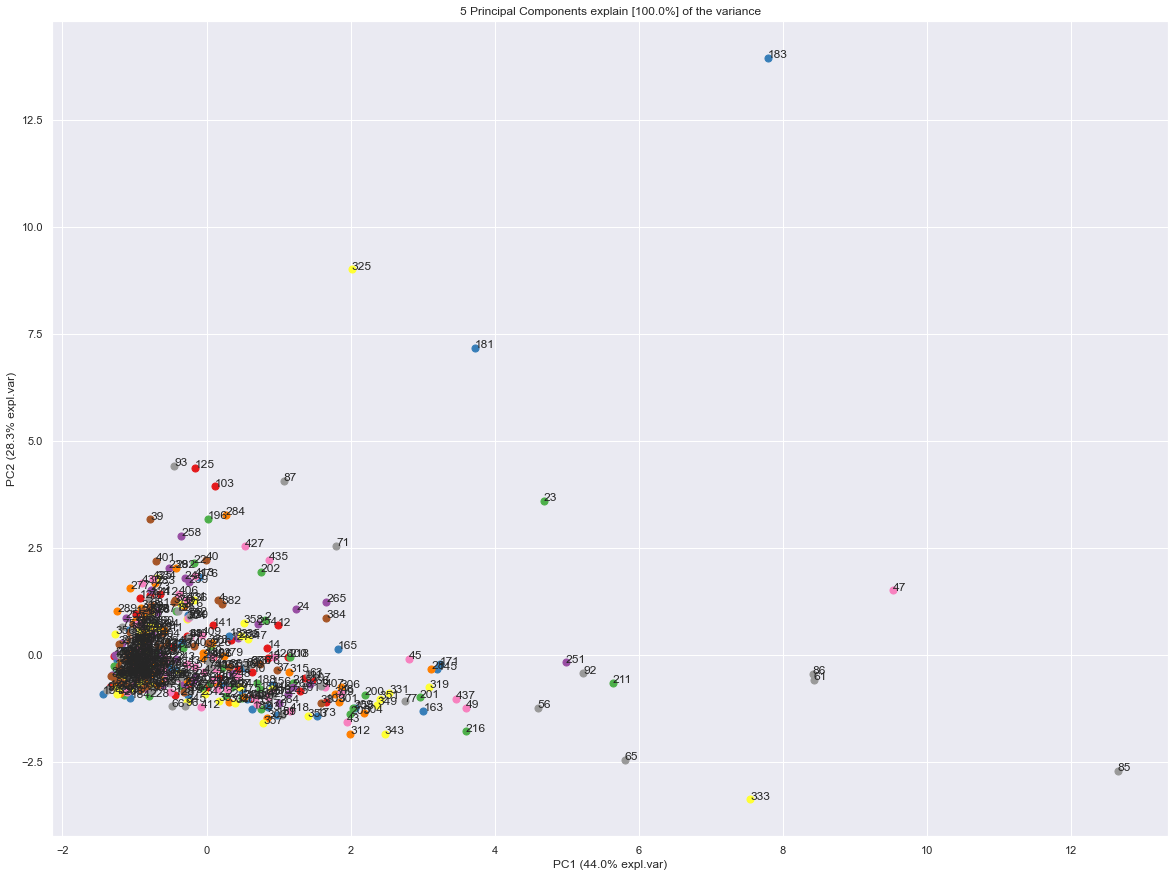

In [98]:
model.scatter(label=True, legend=False)

Eigenvectors

In [99]:
A = out['loadings'].T

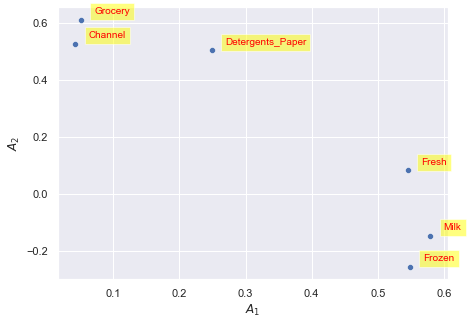

In [100]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

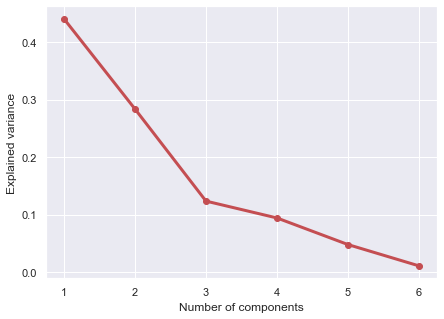

In [101]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

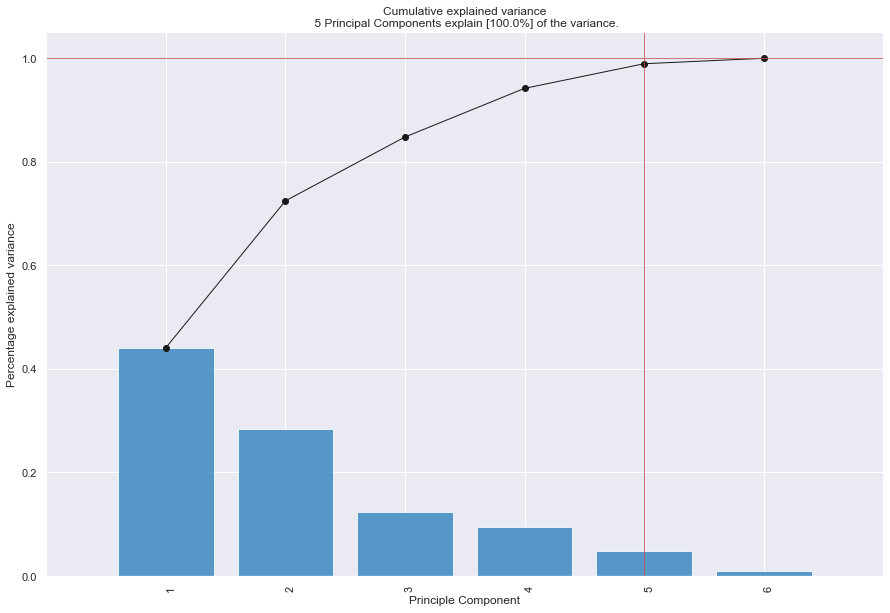

<Figure size 504x360 with 0 Axes>

In [102]:
model.plot();